# Gold Price Prediction
# Harsh Bansal
# Data Science Intern


## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving gold_price.csv to gold_price.csv


In [ ]:
df=pd.read_csv('gold_price.csv', index_col = 'Date',parse_dates= True)
df

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481
...,...,...,...,...,...,...
2019-08-27,1531.85,1532.95,1250.910,1247.510,1378.970,1380.880
2019-08-28,1541.75,1537.15,1263.310,1258.770,1389.890,1387.430
2019-08-29,1536.65,1540.20,1260.510,1262.960,1387.290,1392.030


## Task 1: Initial Data Exploration

In [ ]:
print(df.head(5))
print(df.info())
print(df.shape)
print(df.describe())

            USD (AM)  USD (PM)  GBP (AM)  GBP (PM)  EURO (AM)  EURO (PM)
Date                                                                    
2001-01-02    272.80    271.10   183.026   181.617    288.677    287.334
2001-01-03    269.00    267.15   178.916   177.390    281.823    281.655
2001-01-04    268.75    267.10   178.869   178.352    282.538    282.049
2001-01-05    268.00    267.40   178.488   178.148    280.775    280.882
2001-01-08    268.60    268.30   178.769   178.664    282.410    282.481
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4718 entries, 2001-01-02 to 2019-09-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   USD (AM)   4718 non-null   float64
 1   USD (PM)   4682 non-null   float64
 2   GBP (AM)   4718 non-null   float64
 3   GBP (PM)   4682 non-null   float64
 4   EURO (AM)  4718 non-null   float64
 5   EURO (PM)  4682 non-null   float64
dtypes: float64(6)
memory usage: 258.0 KB
Non

In [ ]:
df['Return'] = df['USD (PM)'].pct_change()*100 
df['Lagged_Return'] = df.Return.shift()
df = df.dropna()

In [ ]:
df['Return'] = df['USD (PM)'].pct_change()*100 
df['Lagged_Return'] = df.Return.shift()
df = df.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM),Return,Lagged_Return
Date,,,,,,,,
2001-01-04,268.75,267.1,178.869,178.352,282.538,282.049,-0.018716,-1.457027
2001-01-05,268.00,267.4,178.488,178.148,280.775,280.882,0.112317,-0.018716
2001-01-08,268.60,268.3,178.769,178.664,282.410,282.481,0.336574,0.112317
2001-01-09,267.75,267.0,179.855,179.195,284.507,283.590,-0.484532,0.336574
2001-01-10,266.70,266.3,178.777,178.665,283.573,283.298,-0.262172,-0.484532


In [ ]:
features = df.iloc[:,:]
features= features.drop('Return' , axis = 1)
label= df['Return']

## Task 2: Create Train & Test Sets

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features ,label, test_size=0.2)
print(f'X_train Shape : {x_train.shape}')
print(f'Y_train Shape : {y_train.shape}')
print(f'Y_test Shape : {y_test.shape}') 
print(f'X_test Shape : {x_test.shape}')


X_train Shape : (3744, 7)
Y_train Shape : (3744,)
Y_test Shape : (936,)
X_test Shape : (936, 7)


## Task 3: Develop Models & Predictions

In [ ]:
from sklearn.linear_model import LinearRegression 

linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

y_pred = linear_model.predict(x_test)

x_score = linear_model.score(x_train,y_train)
print(f'Accuracy score on train data: {x_score:.2f}')

Accuracy score on train data: 0.30


In [ ]:
prediction= pd.DataFrame(list(zip(y_test,y_pred)))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fca8c5f50d0>,
      dtype=object)

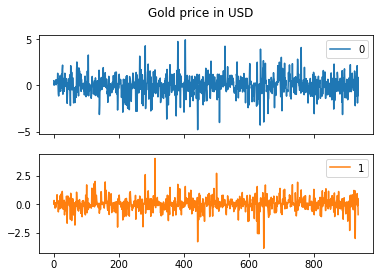

In [ ]:
prediction.plot(subplots=True, title='Gold price in USD')